# Άσκηση

Μέχρι στιγμής έχουμε δει clustering μόνο πάνω σε δισδιάστατα δεδομένα, τα οποία μπορούμε να οπτικοποιήσουμε εύκολα και να κρίνουμε το αποτέλεσμα και με το μάτι. Τώρα όμως θα βάλουμε στην είσοδο του αλγορίθμου δεδομένα πολλών διαστάσεων με θόρυβο. Για τη σωστή επιλογή του **k**, θα πρέπει αναγκαστικά να βασιστούμε στις μετρικές που αναφέραμε προηγουμένως. Ας φτιάξουμε αρχικά τα δεδομένα μας.

In [1]:
import numpy as np

np.random.seed(13)

# Χρήσιμα features
f1 = np.random.rand(50,4) * 10
f2 = np.random.rand(50,4) * 10 + 15
f3 = np.random.rand(50,4) * 10 + 30
f4 = np.random.rand(50,4) * 10 + 45
useful = np.concatenate([f1, f2, f3, f4])
print 'useful features: ', useful.shape

# Θόρυβος
noise = np.random.rand(len(useful),useful.shape[1]**2) + np.random.rand(useful.shape[1]**2,) * useful.max()
print 'noise:           ', noise.shape

# Προσθέτουμε τις στήλες θορύβου
data = np.hstack([useful, noise])
print 'features + noise:', data.shape

# Shuffle
np.random.shuffle(data.T)

useful features:  (200, 4)
noise:            (200, 16)
features + noise: (200, 20)


## Ερώτημα 1

Χρησιμοποιήστε το εμπειρικό κριτήριο "elbow", για να υπολογίσετε μέσω του inertia το βέλτιστο **k**, χρησιμοποιώντας ως δεδομένα **μόνο** τα χρήσιμα χαρακτηριστικά (μεταβλητή **useful**). Δοκιμάστε όλες τις τιμές για $k \in \left[ 1, 50 \right]$ και χρονομετρήστε το διάστημα που παίρνει να εκπαιδευτεί ο κάθε k-means. Ο σκελετός σάς δίνεται παρακάτω.

- Ποιο είναι το βέλτιστο **k**;
- Τι παρατηρείτε για τον χρόνο εκπαίδευσης όσο μεγαλώνει το **k**;

Συμπληρώνουμε στον παρακάτω κώδικα τις εντολές που λείπουν εκεί όπου υπάρχουν σχόλια και συμπληρώνουμε τα ορίσματα εκεί όπου υπάρχουν `???`.
Έπειτα απαντάμε τις παραπάνω ερωτήσεις.

Τις τιμές του **k** θα τις αποθηκεύσουμε σε μία λίστα που θα ονομάσουμε `k_range`. Τις τιμές του inertia θα τις αποθηκεύσουμε σε μια λίστα που θα ονομάσουμε `useful_inertia`.

In [2]:
from sklearn.cluster import KMeans
import time

start_time = time.time()
k_range = range(1,50)
useful_inertia = []
# <-- κάτι πρέπει να μπει εδώ :)

for k in k_range: # ορίζουμε το εύρος του k
    ep_time = time.time()
    
    # ορίζουμε και εκπαιδεύουμε έναν k-means
    km = KMeans(k,random_state=13)
    km.fit(useful)
    # αποθηκεύουμε τη μεταβλητή inertia_ 
    useful_inertia.append(km.inertia_)
    if k%5==0:
        print 'k={:<2}, time={:.2f} sec'.format(k, float(time.time()-ep_time))
print 'training time: {} sec'.format(time.time()-start_time)

# Έλεγχος αν συμβαδίζουν οι διαστάσεις
assert len(k_range) == len(useful_inertia), 'Πρέπει οι λίστες k_range και useful_inertia να έχουν τον ίδιο αριθμό στοιχείων!'

k=5 , time=0.02 sec
k=10, time=0.04 sec
k=15, time=0.05 sec
k=20, time=0.06 sec
k=25, time=0.07 sec
k=30, time=0.09 sec
k=35, time=0.10 sec
k=40, time=0.11 sec
k=45, time=0.12 sec
training time: 3.68244981766 sec


(0, 235186.48192224582)

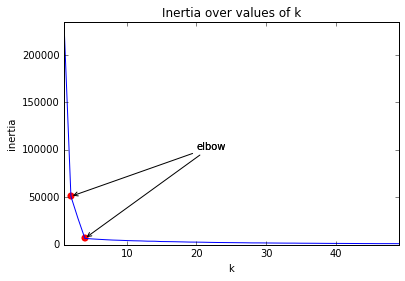

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, useful_inertia)
plt.ylabel('inertia')
plt.xlabel('k')
plt.title('Inertia over values of k')

# Αφότου εντοπίσουμε το elbow, βγάζουμε τις παρακάτω εντολές από σχόλια και αναθέτουμε την τιμή του στη μεταβλητή elbow:

elbow = 2
plt.scatter(elbow,useful_inertia[elbow-1], c='r', lw=0, s=50)
plt.annotate("elbow", xy=(elbow,useful_inertia[elbow-1]), xytext=(20, 100000), arrowprops=dict(arrowstyle="->"))
plt.xlim([k_range[0], k_range[-1]])
plt.ylim([0,useful_inertia[0]])

elbow = 4
plt.scatter(elbow,useful_inertia[elbow-1], c='r', lw=0, s=50)
plt.annotate("elbow", xy=(elbow,useful_inertia[elbow-1]), xytext=(20, 100000), arrowprops=dict(arrowstyle="->"))
plt.xlim([k_range[0], k_range[-1]])
plt.ylim([0,useful_inertia[0]])

## Ερώτημα 2

Εφαρμόστε την ίδια διαδικασία για τα δεδομένα **μαζί με το θόρυβο** (μεταβλητή **data**). Χρησιμοποιήστε τις ίδιες τιμές του **k** με πριν. Χρονομετρήστε όπως και πριν τη διαδικασία.

- Αλλάζει το βέλτιστο **k** σε σχέση με πριν;
- Ανταποκρίνεται ο αλγόριθμος ικανοποιητικά στο θόρυβο που προσθέσαμε;
- Τι παρατηρείτε για το χρόνο εκπαίδευσης σε σχέση με πριν που είχαμε μόνο τα χρήσιμα χαρακτηριστικά;

Τις τιμές του inertia θα τις αποθηκεύσουμε σε μια λίστα που θα ονομάσουμε `data_inertia`.

In [4]:
# Αντιγράφουμε τα παραπάνω 2 κελιά κώδικα και τροποποιούμε όπου χρειάζεται.
# Κελί 1: αποθηκεύουμε το inertia_ για όλες τις τιμές του k.
from sklearn.cluster import KMeans
import time

start_time = time.time()
k_range = range(1,50)
data_inertia = []
# <-- κάτι πρέπει να μπει εδώ :)

for k in k_range: # ορίζουμε το εύρος του k
    ep_time = time.time()
    
    # ορίζουμε και εκπαιδεύουμε έναν k-means
    km = KMeans(k,random_state=13)
    km.fit(data)
    # αποθηκεύουμε τη μεταβλητή inertia_ 
    data_inertia.append(km.inertia_)
    if k%5==0:
        print 'k={:<2}, time={:.2f} sec'.format(k, float(time.time()-ep_time))
print 'training time: {} sec'.format(time.time()-start_time)

# Έλεγχος αν συμβαδίζουν οι διαστάσεις
assert len(k_range) == len(data_inertia), 'Πρέπει οι λίστες k_range και data_inertia να έχουν τον ίδιο αριθμό στοιχείων!'

k=5 , time=0.03 sec
k=10, time=0.04 sec
k=15, time=0.05 sec
k=20, time=0.07 sec
k=25, time=0.08 sec
k=30, time=0.09 sec
k=35, time=0.10 sec
k=40, time=0.11 sec
k=45, time=0.12 sec
training time: 3.80393695831 sec


(0, 235186.48192224582)

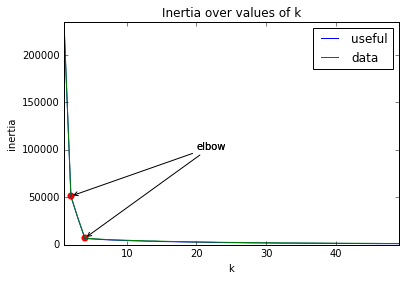

In [5]:
# Έλεγχος αν συμβαδίζουν οι διαστάσεις
assert len(k_range) == len(data_inertia), 'Πρέπει οι λίστες k_range και data_inertia να έχουν τον ίδιο αριθμό στοιχείων!'

plt.plot(k_range, useful_inertia, label='useful')
plt.plot(k_range, data_inertia, c='g', label='data')
plt.ylabel('inertia')
plt.xlabel('k')
plt.legend(loc='upper right')
plt.title('Inertia over values of k')

# Αφότου εντοπίσουμε το elbow, βγάζουμε τις παρακάτω εντολές από σχόλια και αναθέτουμε την τιμή του στην μεταβλητή elbow:


elbow = 2
plt.scatter(elbow,data_inertia[elbow-1], c='r', lw=0, s=50)
plt.annotate("elbow", xy=(elbow,data_inertia[elbow-1]), xytext=(20, 100000), arrowprops=dict(arrowstyle="->"))
plt.xlim([k_range[0], k_range[-1]])
plt.ylim([0,useful_inertia[0]])

elbow = 4
plt.scatter(elbow,data_inertia[elbow-1], c='r', lw=0, s=50)
plt.annotate("elbow", xy=(elbow,data_inertia[elbow-1]), xytext=(20, 100000), arrowprops=dict(arrowstyle="->"))
plt.xlim([k_range[0], k_range[-1]])
plt.ylim([0,useful_inertia[0]])

## Ερώτημα 3

Χρησιμοποιήστε το κριτήριο **silhouette** για τον υπολογισμό του βέλτιστου **k**. Αυτή τη φορά ελέγξτε για όλες τις τιμές του $k \in \left[ 2, 100 \right]$.

- Ποιο **k** βρήκατε; Ήταν διαφορετικό από πριν;

Τις τιμές του **k** θα τις αποθηκεύσουμε σε μία λίστα που θα ονομάσουμε `k_range`. Τις τιμές των silhouette score θα τις αποθηκεύσουμε σε μια λίστα που θα ονομάσουμε `silhouette_scores`.

In [7]:
# Αντιγράφουμε τα κελιά παραπάνω, τροποποιούμε όπου χρειάζεται.
# Κελί 1: αυτή τη φορά αποθηκεύουμε το silouette_score και όχι το inertia!

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import time

start_time = time.time()
k_range = range(2,100)
silhouette_scores = []
# <-- κάτι πρέπει να μπει εδώ :)

for k in k_range: # ορίζουμε το εύρος του k
    ep_time = time.time()
    
    # ορίζουμε και εκπαιδεύουμε έναν k-means
    km = KMeans(k,random_state=13)
    km.fit(data)
    # αποθηκεύουμε τη μεταβλητή silhouete_score 
    preds = km.predict(data)
    silhouette_scores.append(silhouette_score(data, preds))
    
    if k%5==0:
        print 'k={:<2}, time={:.2f} sec'.format(k, float(time.time()-ep_time))
print 'training time: {} sec'.format(time.time()-start_time)

# Έλεγχος αν συμβαδίζουν οι διαστάσεις
assert len(k_range) == len(silhouette_scores), 'Πρέπει οι λίστες k_range και silhouette_scores να έχουν τον ίδιο αριθμό στοιχείων!'

k=5 , time=0.05 sec
k=10, time=0.05 sec
k=15, time=0.06 sec
k=20, time=0.09 sec
k=25, time=0.11 sec
k=30, time=0.12 sec
k=35, time=0.14 sec
k=40, time=0.16 sec
k=45, time=0.18 sec
k=50, time=0.20 sec
k=55, time=0.22 sec
k=60, time=0.23 sec
k=65, time=0.26 sec
k=70, time=0.35 sec
k=75, time=0.31 sec
k=80, time=0.36 sec
k=85, time=0.37 sec
k=90, time=0.43 sec
k=95, time=0.42 sec
training time: 21.5366561413 sec


(0, 1)

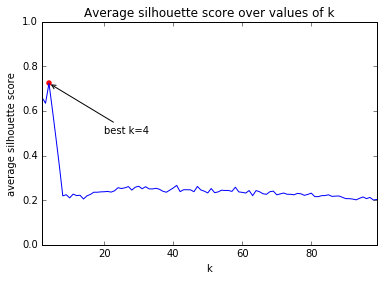

In [8]:
assert len(k_range) == len(silhouette_scores), 'Πρέπει οι λίστες k_range και silhouette_scores να έχουν τον ίδιο αριθμό στοιχείων!'

plt.plot(k_range, silhouette_scores)
plt.ylabel('average silhouette score')
plt.xlabel('k')
plt.title('Average silhouette score over values of k')

# Εύρεση βέλτιστου k
best_k = np.argmax(silhouette_scores) + 2
plt.scatter(best_k ,silhouette_scores[best_k-2], c='r', lw=0, s=30)
plt.annotate('best k={}'.format(best_k), xy=(best_k, silhouette_scores[best_k-2]), xytext=(20, 0.5), arrowprops=dict(arrowstyle="->"))
plt.xlim([k_range[0], k_range[-1]])
plt.ylim([0,1])